[참고](https://dacon.io/competitions/official/235840/codeshare/3812?page=1&dtype=recent)

## 1. Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data loading

In [2]:
train = pd.read_csv('dacondata/train_wine.csv', index_col='index')
print(train.shape)
train.head()

(5497, 13)


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [3]:
test = pd.read_csv('dacondata/test_wine.csv', index_col='index')
print(test.shape)
test.head()

(1000, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [4]:
submission = pd.read_csv("dacondata/sample_submission_wine.csv", index_col='index')
print(submission.shape)
submission.head(3)

(1000, 1)


,quality
index,
0,0
1,0
2,0


## 3. Preprocessing

### 3-0) Missing values

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 601.2+ KB


In [6]:
train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  type                  1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 101.6+ KB


### 3-1) quality

In [8]:
train['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

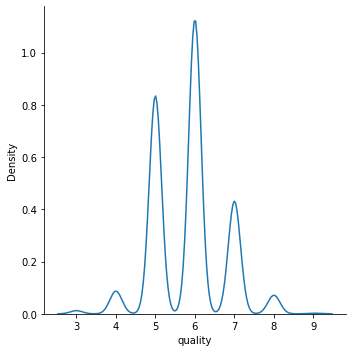

In [9]:
sns.displot(train['quality'], kind='kde')

In [10]:
train['quality'].describe()

count    5497.000000
mean        5.818992
std         0.870311
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [11]:
train.loc[train['quality'] <= 6, 'qual_grade'] = 0
train.loc[train['quality'] > 6, 'qual_grade'] = 1

In [12]:
# 빈도 및 비율 확인
train['qual_grade'].value_counts(), train['qual_grade'].value_counts(normalize=True)

(0.0    4416
 1.0    1081
 Name: qual_grade, dtype: int64,
 0.0    0.803347
 1.0    0.196653
 Name: qual_grade, dtype: float64)

### 3-2) type

In [13]:
train['type'].value_counts(normalize=True), test['type'].value_counts(normalize=True)

(white    0.756595
 red      0.243405
 Name: type, dtype: float64,
 white    0.739
 red      0.261
 Name: type, dtype: float64)

In [14]:
# train_type 값 변경
train['type(encode)'] = train['type'].replace({'white':0, 'red':1})
train['type'].value_counts(), train['type(encode)'].value_counts()

(white    4159
 red      1338
 Name: type, dtype: int64,
 0    4159
 1    1338
 Name: type(encode), dtype: int64)

In [15]:
# test_type 값 변경
test['type(encode)'] = test['type'].replace({'white':0, 'red':1})

## 4. Analysis
### 4-0) Correlation analysis

<AxesSubplot:>

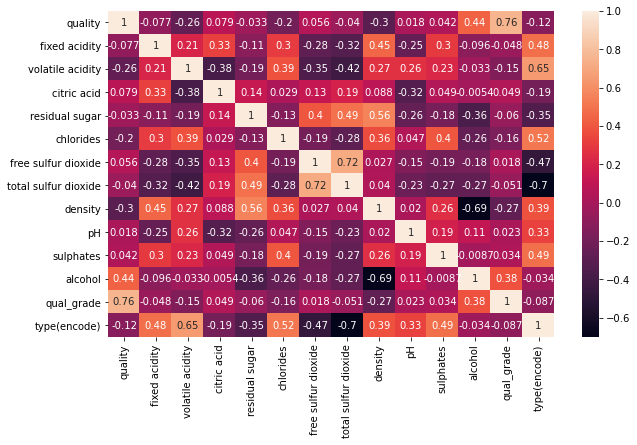

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True)

In [17]:
train.corr()['quality']

quality                 1.000000
fixed acidity          -0.076506
volatile acidity       -0.261557
citric acid             0.079157
residual sugar         -0.032848
chlorides              -0.198148
free sulfur dioxide     0.055574
total sulfur dioxide   -0.039732
density                -0.299831
pH                      0.017931
sulphates               0.042068
alcohol                 0.439615
qual_grade              0.756656
type(encode)           -0.118280
Name: quality, dtype: float64

In [18]:
train.columns

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type',
       'qual_grade', 'type(encode)'],
      dtype='object')

### 4-1) Visualization by each feature

<AxesSubplot:xlabel='type', ylabel='count'>

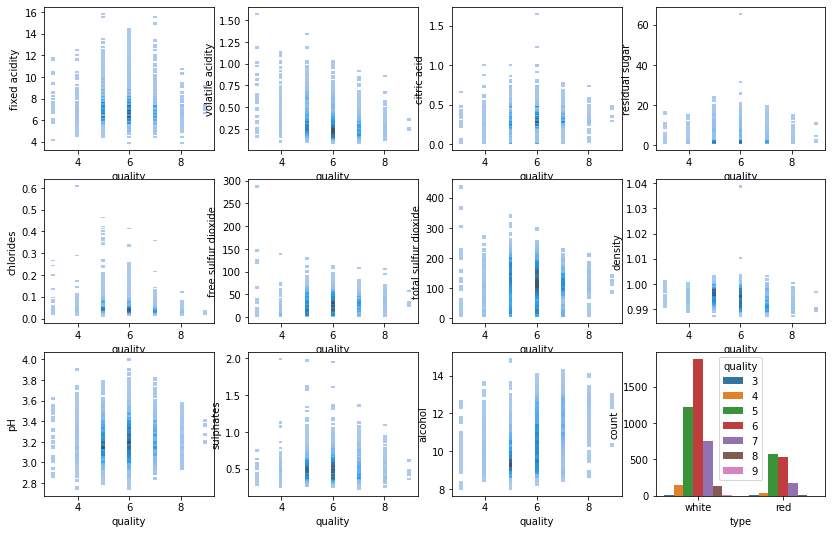

In [19]:
figure, ax = plt.subplots(3, 4)
figure.set_size_inches(14,9)

sns.histplot(data=train, y="fixed acidity", x="quality", ax=ax[0][0])
sns.histplot(data=train, y="volatile acidity", x="quality", ax=ax[0][1])
sns.histplot(data=train, y="citric acid", x="quality", ax=ax[0][2])
sns.histplot(data=train, y="residual sugar", x="quality", ax=ax[0][3])

sns.histplot(data=train, y="chlorides", x="quality", ax=ax[1][0])
sns.histplot(data=train, y="free sulfur dioxide", x="quality", ax=ax[1][1])
sns.histplot(data=train, y="total sulfur dioxide", x="quality", ax=ax[1][2])
sns.histplot(data=train, y="density", x="quality", ax=ax[1][3])

sns.histplot(data=train, y="pH", x="quality", ax=ax[2][0])
sns.histplot(data=train, y="sulphates", x="quality", ax=ax[2][1])
sns.histplot(data=train, y="alcohol", x="quality", ax=ax[2][2])
sns.countplot(data=train, x='type', hue='quality', ax=ax[2][3])

<AxesSubplot:xlabel='type', ylabel='count'>

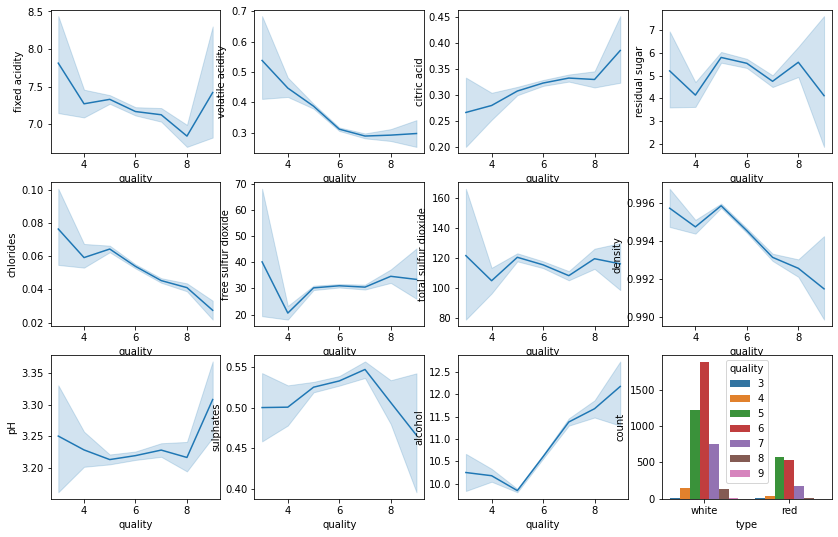

In [20]:
figure, ax = plt.subplots(3, 4)
figure.set_size_inches(14,9)

sns.lineplot(data=train, y="fixed acidity", x="quality", ax=ax[0][0])
sns.lineplot(data=train, y="volatile acidity", x="quality", ax=ax[0][1])
sns.lineplot(data=train, y="citric acid", x="quality", ax=ax[0][2])
sns.lineplot(data=train, y="residual sugar", x="quality", ax=ax[0][3])

sns.lineplot(data=train, y="chlorides", x="quality", ax=ax[1][0])
sns.lineplot(data=train, y="free sulfur dioxide", x="quality", ax=ax[1][1])
sns.lineplot(data=train, y="total sulfur dioxide", x="quality", ax=ax[1][2])
sns.lineplot(data=train, y="density", x="quality", ax=ax[1][3])

sns.lineplot(data=train, y="pH", x="quality", ax=ax[2][0])
sns.lineplot(data=train, y="sulphates", x="quality", ax=ax[2][1])
sns.lineplot(data=train, y="alcohol", x="quality", ax=ax[2][2])
sns.countplot(data=train, x='type', hue='quality', ax=ax[2][3])

### 4-3) Data Standardization (Normalization)

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [22]:
s_scaler = StandardScaler()
m_scaler = MinMaxScaler()

In [23]:
train.iloc[ : , 1:12].columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [24]:
s_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [25]:
print(train[s_col].shape)
train[s_col].head()

(5497, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
index,,,,,,,,,,,
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9


In [26]:
# Standardization scaler

train_sscale = s_scaler.fit_transform(train[s_col])
df_train = pd.DataFrame(train_sscale, columns=s_col)

In [27]:
# Nomalization (Min-Max) scaler

train_mscale = m_scaler.fit_transform(train[s_col])
df_train = pd.DataFrame(train_mscale, columns=s_col)

In [28]:
df_train = pd.concat([df_train, train[s_col].reset_index()['index']], axis=1)
df_train.set_index('index', inplace=True)

df_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
index,,,,,,,,,,,
0,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841
1,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391
2,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290


In [29]:
# Standardization scaler

test_sscale = s_scaler.fit_transform(test[s_col])
df_test = pd.DataFrame(test_sscale, columns=s_col)

In [30]:
# Nomalization (Min-Max) scaler

test_mscale = m_scaler.fit_transform(test[s_col])
df_test = pd.DataFrame(test_mscale, columns=s_col)

In [31]:
df_test = pd.concat([df_test, test[s_col].reset_index()['index']], axis = 1)
df_test.set_index('index', inplace=True)

df_test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
index,,,,,,,,,,,
0,0.421053,0.198276,0.592593,0.269406,0.048576,0.082305,0.234043,0.376667,0.169811,0.138889,0.571429
1,0.798246,0.301724,0.716049,0.054795,0.093802,0.115226,0.117021,0.816667,0.320755,0.240741,0.107143
2,0.201754,0.172414,0.333333,0.205479,0.043551,0.353909,0.609929,0.443333,0.443396,0.425926,0.178571


## 5. Modeling

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 5-0) Feature selection (the first approach)

In [33]:
X_train = train.drop(columns = ['type', 'quality', 'qual_grade'])
y_train = train['quality']

In [34]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,type(encode)
index,,,,,,,,,,,,,
0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white,0
1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red,1
2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white,0
3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white,0
4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red,1
996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white,0
997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red,1


In [35]:
X_test = test.drop(columns = ['type'])

In [36]:
X_train.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type(encode)
index,,,,,,,,,,,,
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0


In [37]:
X_test.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type(encode)
index,,,,,,,,,,,,
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.9938,2.9,0.38,11.6,0


### 5-1) Feature selection (for standardization)

In [38]:
df_train.columns
f_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
f_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [39]:
X_train = df_train[f_names]
y_train = train['quality']

In [40]:
X_test = df_test[f_names]

#### 5-1)-1) Models: Logistic Regression

In [41]:
l_reg = LogisticRegression(solver='liblinear', random_state=30) # solver: 최적화에 사용할 알고리즘 결정

In [42]:
l_reg.fit(X_train, y_train)

LogisticRegression(random_state=30, solver='liblinear')

In [43]:
pred = l_reg.predict(X_test)
pred

array([6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 7, 6, 5, 6, 6,
       5, 6, 6, 5, 5, 5, 6, 6, 7, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 7, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 5, 7, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5,
       6, 5, 6, 6, 6, 7, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6,
       6, 5, 6, 5, 5, 5, 5, 7, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 7, 5,
       6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 7, 6, 5, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 7, 5, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 7, 6,

### 5-1)-2) Models: RandomForest

In [44]:
rf_clf = RandomForestClassifier(random_state=30)

In [45]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [46]:
pred = rf_clf.predict(X_test)
pred

array([6, 6, 6, 5, 7, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 7, 6,
       5, 6, 6, 6, 5, 5, 6, 5, 7, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6,
       7, 6, 6, 5, 7, 6, 5, 6, 7, 5, 6, 5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 7, 6, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6,
       5, 6, 6, 6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6,
       6, 6, 7, 6, 6, 7, 6, 7, 6, 5, 6, 7, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6,
       5, 7, 6, 6, 6, 6, 7, 5, 6, 5, 6, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 7, 6,

### 5-1)-3) Models: GradientBoosting

In [47]:
gb_clf = GradientBoostingClassifier(n_estimators=300, random_state=30)

In [48]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=300, random_state=30)

In [49]:
pred = gb_clf.predict(X_test)
pred

array([6, 6, 6, 4, 7, 6, 6, 6, 6, 8, 6, 6, 6, 5, 6, 5, 6, 8, 6, 5, 6, 6,
       6, 8, 6, 5, 4, 5, 3, 5, 8, 4, 4, 5, 4, 6, 5, 6, 6, 6, 6, 6, 6, 4,
       6, 8, 6, 7, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 7, 6, 7, 6, 6, 5, 6, 8, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6,
       7, 8, 6, 5, 6, 6, 6, 6, 6, 6, 8, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 6, 8, 6, 7, 6, 5, 6, 6, 6, 6, 6, 6, 7, 6, 8, 6, 6, 7, 5, 3,
       4, 6, 6, 6, 6, 3, 6, 6, 6, 4, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 4, 6, 3, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 3, 4, 9, 5,
       6, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 5, 6, 6, 6, 6, 6, 4, 6, 7,
       5, 6, 6, 6, 8, 6, 6, 5, 6, 5, 6, 5, 7, 6, 6, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 8, 6, 6, 8, 6, 8, 6, 3, 8, 6, 6, 6, 6, 8, 6, 6, 7, 6, 5, 3,
       3, 7, 6, 6, 6, 6, 8, 6, 5, 5, 3, 5, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6,
       6, 7, 6, 5, 6, 5, 6, 3, 5, 6, 5, 6, 5, 3, 7,

In [50]:
X_train.shape

(5497, 11)

## 6. Validation (Evaluation)
### 6-1) Validation

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [52]:
def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [53]:
X_fit, X_val, y_fit, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, 
                                              random_state=30)

In [54]:
# l_reg.fit(X_fit, y_fit)
rf_clf.fit(X_fit, y_fit)
# gb_clf.fit(X_fit, y_fit)

RandomForestClassifier(random_state=30)

In [55]:
# pred_val = l_reg.predict(X_val)
pred_val = rf_clf.predict(X_val)
# pred_val = gb_clf.predict(X_val)

In [56]:
accuracy_score(y_val, pred_val)

0.6551515151515152

In [57]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.64      0.12      0.21        56
           5       0.69      0.69      0.69       537
           6       0.63      0.74      0.68       725
           7       0.65      0.54      0.59       277
           8       0.86      0.26      0.40        46
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1650
   macro avg       0.50      0.34      0.37      1650
weighted avg       0.66      0.66      0.64      1650



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# Feature importances
pd.DataFrame(rf_clf.feature_importances_, 
             index=X_train.columns, 
             columns=["f_Importances"]).sort_values(by="f_Importances", ascending=False)

,f_Importances
alcohol,0.125685
density,0.102720
volatile acidity,0.099372
chlorides,0.089439
total sulfur dioxide,0.089145
sulphates,0.086522
free sulfur dioxide,0.084862
residual sugar,0.084820
pH,0.083358
citric acid,0.080387


### 6-2) Tuning

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [60]:
params = {

}

In [61]:
rf_clf_grid = RandomForestClassifier(random_state=30)

In [62]:
grid_rf_clf = GridSearchCV(estimator=rf_clf_grid, param_grid=params, cv=3,
                           scoring='accuracy', verbose=1, n_jobs=-1)

In [63]:
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={}, scoring='accuracy', verbose=1)

In [64]:
print(grid_rf_clf.best_score_)
print(grid_rf_clf.best_estimator_)

0.6505340192857614
RandomForestClassifier(random_state=30)


### 6-2)-1) max_depth

In [65]:
lst_max_depth = range(2, 51)
log_max_depth = []

for hp in lst_max_depth:
    rf_clf_tun = RandomForestClassifier(max_depth=hp, random_state=30)
    
    rf_clf_tun.fit(X_fit, y_fit)
    pred_fit = rf_clf_tun.predict(X_fit) # 훈련 데이터의 예측 데이터
    pred_val = rf_clf_tun.predict(X_val) # 평가 데이터의 예측 데이터
    
    score_fit = accuracy_score(y_fit, pred_fit) # 훈련 데이터 점수
    score_val = accuracy_score(y_val, pred_val) # 평가 데이터 점수
    
    print(f"max_depth = {hp}, score(train) = {score_fit:.5f}, score(test) = {score_val:.5f}, score(mean) = {(score_fit + score_val) / 2:.5f}")
    log_max_depth.append({
        "max_depth" : hp,
        "train" : score_fit,
        "test" : score_val
    })

df_log = pd.DataFrame(log_max_depth)

max_depth = 2, score(train) = 0.53678, score(test) = 0.53818, score(mean) = 0.53748
max_depth = 3, score(train) = 0.54926, score(test) = 0.54242, score(mean) = 0.54584
max_depth = 4, score(train) = 0.57395, score(test) = 0.54545, score(mean) = 0.55970
max_depth = 5, score(train) = 0.59293, score(test) = 0.55576, score(mean) = 0.57434
max_depth = 6, score(train) = 0.62828, score(test) = 0.57212, score(mean) = 0.60020
max_depth = 7, score(train) = 0.67299, score(test) = 0.57939, score(mean) = 0.62619
max_depth = 8, score(train) = 0.72316, score(test) = 0.59273, score(mean) = 0.65794
max_depth = 9, score(train) = 0.78711, score(test) = 0.61273, score(mean) = 0.69992
max_depth = 10, score(train) = 0.84845, score(test) = 0.62303, score(mean) = 0.73574
max_depth = 11, score(train) = 0.90226, score(test) = 0.63576, score(mean) = 0.76901
max_depth = 12, score(train) = 0.94307, score(test) = 0.64364, score(mean) = 0.79335
max_depth = 13, score(train) = 0.97349, score(test) = 0.65818, score(mean

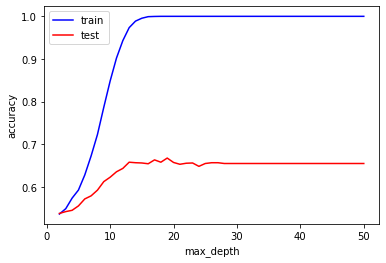

In [66]:
plt.plot(df_log["max_depth"], df_log["train"], label="train", color='b')
plt.plot(df_log["max_depth"], df_log["test"], label="test", color='r')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

### 6-2)-2) n_estimators

In [67]:
lst_n_estimators = range(345,440,5)
log_n_estimators = [] 

for hp in lst_n_estimators:  
    rf_clf_tun = RandomForestClassifier(n_estimators=hp, random_state=30)
    
    rf_clf_tun.fit(X_fit, y_fit)
    pred_fit = rf_clf_tun.predict(X_fit)
    pred_val = rf_clf_tun.predict(X_val)

    score_fit = accuracy_score(y_fit, pred_fit)
    score_val = accuracy_score(y_val, pred_val)
    
    print(f"n_estimators = {hp}, score(train) = {score_fit:.5f}, score(test) = {score_val:.5f}, score(mean) = {(score_fit + score_val) / 2:.5f}")
    log_n_estimators.append({ 
        "n_estimators" : hp,  
        "train" : score_fit,
        "test" : score_val
    })
    
df_log = pd.DataFrame(log_n_estimators)

n_estimators = 345, score(train) = 1.00000, score(test) = 0.65818, score(mean) = 0.82909
n_estimators = 350, score(train) = 1.00000, score(test) = 0.65758, score(mean) = 0.82879
n_estimators = 355, score(train) = 1.00000, score(test) = 0.65879, score(mean) = 0.82939
n_estimators = 360, score(train) = 1.00000, score(test) = 0.65818, score(mean) = 0.82909
n_estimators = 365, score(train) = 1.00000, score(test) = 0.65758, score(mean) = 0.82879
n_estimators = 370, score(train) = 1.00000, score(test) = 0.65818, score(mean) = 0.82909
n_estimators = 375, score(train) = 1.00000, score(test) = 0.65818, score(mean) = 0.82909
n_estimators = 380, score(train) = 1.00000, score(test) = 0.66000, score(mean) = 0.83000
n_estimators = 385, score(train) = 1.00000, score(test) = 0.66061, score(mean) = 0.83030
n_estimators = 390, score(train) = 1.00000, score(test) = 0.66061, score(mean) = 0.83030
n_estimators = 395, score(train) = 1.00000, score(test) = 0.66182, score(mean) = 0.83091
n_estimators = 400, s

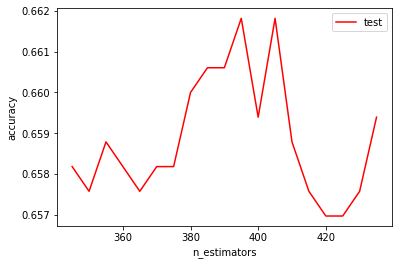

In [68]:
plt.plot(df_log["n_estimators"], df_log["test"], label="test", color='r') 
plt.xlabel('n_estimators')                                                  
plt.ylabel('accuracy')
plt.legend()

### 6-2-3) max_features

In [69]:
lst_max_features = ['auto', 'sqrt', 'log2']
log_max_features = []

for hp in lst_max_features:             
    rf_clf_tun = RandomForestClassifier(max_features=hp, random_state=30)
    
    rf_clf_tun.fit(X_fit, y_fit)
    pred_fit = rf_clf_tun.predict(X_fit)
    pred_val = rf_clf_tun.predict(X_val)
    
    score_fit = accuracy_score(y_fit, pred_fit)
    score_val = accuracy_score(y_val, pred_val)
    
    print(f"max_features = {hp}, score(train) = {score_fit:.5f}, score(test) = {score_val:.5f}, score(mean) = {(score_fit + score_val) / 2:.5f}")
    log_max_features.append({  
        "max_features" : hp,  
        "train" : score_fit,
        "test" : score_val
    })
    
df_log = pd.DataFrame(log_max_features)

max_features = auto, score(train) = 1.00000, score(test) = 0.65515, score(mean) = 0.82758
max_features = sqrt, score(train) = 1.00000, score(test) = 0.65515, score(mean) = 0.82758
max_features = log2, score(train) = 1.00000, score(test) = 0.65515, score(mean) = 0.82758


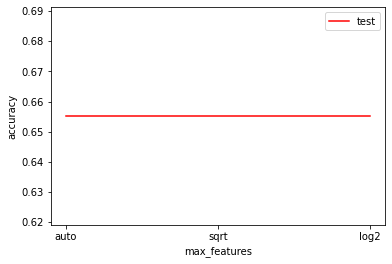

In [70]:
# plt.plot(df_log["max_features"], df_log["train"], label="train", color='b')
plt.plot(df_log["max_features"], df_log["test"], label="test", color='r')
plt.xlabel('max_features')                     
plt.ylabel('accuracy')
plt.legend()

### 6-2-4) min_samples_split

In [ ]:
lst_min_samples_split = range(2,30)
log_min_samples_split = []